En esta fase se desarrolla el análisis exploratorio del conjunto de datos final, con el objetivo de comprender su estructura, describir la distribución de las variables e identificar patrones relevantes. Se evalúan tendencias, posibles valores extremos y relaciones que existen entre variables, especialmente en torno a la variable objetivo `is_fraud`.

## Objetivo del análisis exploratorio de datos

El objetivo de este análisis exploratorio es examinar en profundidad el comportamiento y las características de las transacciones con tarjeta de crédito, mediante la integración de información económica a nivel de código postal, con el fin de comprender cómo se distribuye el fraude y qué factores se asocian con una mayor probabilidad de fraude. A través de esta revisión se pretende interpretar cada transacción no únicamente por sus atributos operativos, sino también considerando el entorno socioeconómico asociado al área en el que se produce, lo que permite ampliar el alcance del análisis y aportar una interpretación más completa.

El análisis busca identificar patrones y tendencias relevantes, así como posibles relaciones entre el fraude y variables clave del dataset, como el importe de la transacción, la categoría del comercio, la ubicación geográfica y los indicadores económicos agregados por ZIP. Los resultados obtenidos servirán como base para el análisis estadístico posterior, ayudando a priorizar variables de interés, establecer hipótesis de trabajo y definir indicadores y segmentaciones útiles para la elaboración del informe final.

## Importación de librerias

In [1]:
# Tratamiento de datos.

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualizaciones.

import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos `df_final.parquet`

In [2]:
df_final = pd.read_parquet("../TFM1/Fraude_EDA/data/2.processed/df_final.parquet")

Se inspecciona el encabezado del dataset para comprobar que la carga se ha realizado sin incidencias.

In [3]:
df_final.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,number_of_returns,adjusted_gross_income_agi,avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
0,2019-06-22 12:28:00,fraud_Predovic Inc,Shopping_net,5.79,Male,Reno,Texas,89512,276896,Immunologist,1997-03-12,0,9810.0,291026.0,29.666259,9810.0,293304.0,29.898471,6420.0,149740.0,23.323988
1,2019-04-28 19:43:17,"fraud_Turner, Ziemann and Lehner",Food_dining,55.25,Male,Palermo,Ohio,58769,229,Administrator,1983-03-20,0,150.0,19468.0,129.786667,150.0,19782.0,131.880000,130.0,16059.0,123.530769
2,2019-11-26 13:06:50,"fraud_Schroeder, Wolff and Hermiston",Travel,525.26,Male,Richland,Pennsylvania,08350,825,Licensed Conveyancer,1991-07-06,0,380.0,18448.0,48.547368,380.0,18677.0,49.150000,310.0,11536.0,37.212903
3,2019-06-19 12:30:36,"fraud_Schroeder, Wolff and Hermiston",Travel,7.94,Female,Hawley,Michigan,56549,4508,Naval Architect,1949-04-24,0,2260.0,148251.0,65.597788,2260.0,151377.0,66.980973,1910.0,102419.0,53.622513
4,2019-05-19 18:01:52,fraud_Baumbach Ltd,Personal_care,9.55,Male,Comfrey,North Carolina,56019,914,Health And Safety Adviser,1944-07-26,0,440.0,22379.0,50.861364,440.0,23428.0,53.245455,360.0,14901.0,41.391667


Se consulta el final del dataset para asegurar que no existen cortes o anomalías en los registros finales.

In [4]:
df_final.tail()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,number_of_returns,adjusted_gross_income_agi,avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
325085,2019-06-20 15:07:33,"fraud_Baumbach, Strosin and Nicolas",Shopping_pos,8.23,Female,Hedley,Wisconsin,79237,513,Early Years Teacher,1976-05-24,0,180.0,5351.0,29.727778,180.0,5451.0,30.283333,110.0,2905.0,26.409091
325086,2019-04-25 12:02:16,fraud_Erdman-Ebert,Personal_care,9.78,Female,Hopewell,California,23860,31970,Purchasing Manager,1935-08-15,0,12540.0,515284.0,41.091228,12540.0,519508.0,41.428070,9170.0,306179.0,33.389204
325087,2019-10-25 16:49:47,"fraud_O'Connell, Botsford and Hand",Home,26.62,Male,Grenada,Kentucky,96038,589,Systems Analyst,1945-12-21,0,280.0,11039.0,39.425000,280.0,11223.0,40.082143,200.0,5706.0,28.530000
325088,2019-01-15 20:24:39,"fraud_Witting, Beer and Ernser",Home,3.70,Female,Norwich,Minnesota,43767,1443,Research Scientist (Medical),1962-03-04,0,650.0,35001.0,53.847692,650.0,35515.0,54.638462,550.0,22850.0,41.545455
325089,2019-10-05 19:15:19,fraud_Kassulke Inc,Entertainment,14.30,Male,Greenwich,New York,08323,804,Insurance Risk Surveyor,1965-03-25,0,360.0,23882.0,66.338889,360.0,24325.0,67.569444,300.0,16373.0,54.576667


### Dimensión del dataset

Se verifica la forma del dataset para confirmar el volumen de información.

In [5]:
print(f"El número de filas es {df_final.shape[0]} y el número de columnas es {df_final.shape[1]} ")

El número de filas es 325090 y el número de columnas es 21 


In [6]:
df_final.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'is_fraud',
       'number_of_returns', 'adjusted_gross_income_agi', 'avg_agi',
       'number_of_returns_with_total_income', 'total_income_amount',
       'avg_total_income', 'number_of_returns_with_taxable_income',
       'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

## Creación de nuevas variables

Se generan nuevas variables a partir de las existentes para mejorar la calidad analítica del dataset, reducir la complejidad de ciertas relaciones y habilitar segmentaciones que aporten valor al análisis exploratorio y al dashboard.

### Variables temporales

In [7]:
df_final["trans_date"] = df_final["trans_date_trans_time"].dt.date

df_final["trans_date"] = pd.to_datetime(df_final['trans_date'])

df_final["day_of_week"] = df_final["trans_date_trans_time"].dt.day_name()

df_final["hour"] = df_final["trans_date_trans_time"].dt.hour

In [8]:
def moment_of_day(h):

    if 0 <= h <= 4:
        return "night"
    
    elif 5 <= h <= 7:
        return "early morning"   
    
    elif 8 <= h <= 11:
        return "morning"
    
    elif 12 <= h <= 16:
        return "afternoon"
    
    elif 17 <= h <= 20:
        return "evening"
    
    else:
        return "late night"
    
df_final["moment_of_day"] = df_final["hour"].map(moment_of_day)

Se crean variables temporales derivadas de `trans_date_trans_time` para analizar el comportamiento de las transacciones y detectar patrones asociados al fraude. En concreto, se extraen componentes como año, mes, día de la semana y hora, lo que permite estudiar tendencias, estacionalidad y variaciones recurrentes a lo largo del tiempo. Además, se define `is_weekend` para comparar de forma directa días laborables vs. fines de semana, simplificando el análisis y la interpretación en tablas y visualizaciones.

Finalmente, se agrupa la hora en franjas `moment_of_day` mediante intervalos más detallados. Con esto se busca reducir el ruido de trabajar con 24 categorías distintas y mejora la interpretabilidad, facilitando comparaciones y visualizaciones en el EDA y en el dashboard. En conjunto, estas transformaciones permiten analizar la tasa de fraude y el volumen de transacciones por periodos y franjas horarias, identificando estacionalidad, tendencias y posibles comportamientos anómalos en horarios menos habituales.

### Variables de edad

In [9]:
df_final["age"] = ((df_final["trans_date_trans_time"] - df_final["dob"]).dt.days / 365.25).astype(int)

In [10]:
print(df_final["age"].max())

print(df_final["age"].min())

95
13


In [11]:
ages = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]

ages_segments = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86+"]

df_final["age_group"] = pd.cut(df_final["age"], bins=ages, labels=ages_segments)

Se crea la variable `age` para disponer de una medida cuantitativa del perfil del cliente en el momento de la transacción, calculada a partir de la diferencia entre la fecha de la transacción y la fecha de nacimiento. Esta variable permite analizar si existen diferencias en el importe, la frecuencia y la tasa de fraude según la edad, y facilita la detección de patrones demográficos relevantes.

Posteriormente, se construye `age_group`, agrupando la edad en rangos predefinidos. Esto mejora la interpretabilidad y la comparación de resultados, ya que permite equiparar segmentos de edad, en vez de trabajar con edades individuales.

### Variables socioeconómicas

In [12]:
df_final["taxable_share"] = (df_final["taxable_income_amount"] / df_final["total_income_amount"])

Se calcula `taxable_share`, representa que parte del ingreso total es imponible. Esta variable aporta información sobre la estructura económica del ZIP y permite analizar si el patrón de fraude y consumo cambia en zonas donde una mayor proporción del ingreso está sujeta a tributación.

In [13]:
df_final["amt_vs_avg_agi"] = df_final["amt"] / df_final["avg_agi"]

Se genera `amt_vs_avg_agi`, para contextualizar el importe de cada transacción respecto al nivel de renta medio del ZIP. De este modo, una misma cantidad puede interpretarse en términos relativos, facilitando la comparación entre zonas con diferentes niveles de ingresos y ayudando a identificar transacciones inusualmente altas para su contexto socioeconómico.

In [14]:
income_segment = ["low", "lower-middle", "upper-middle", "high"]

df_final["income_level"] = pd.qcut(df_final["avg_agi"], q = 4, labels = income_segment)

Se crea `income_bracket` dividiendo `avg_agi` en cuatro grupos. Esta segmentación transforma una variable continua en categorías, mejorando la lectura de resultados y permitiendo comparar métricas como la tasa de fraude y el importe medio entre distintos niveles de renta.

### Eliminación de variables para reducir el ruido

In [15]:
cols_drop = ["trans_date_trans_time", "dob", "adjusted_gross_income_agi", "total_income_amount", "taxable_income_amount", "number_of_returns_with_total_income", "number_of_returns_with_taxable_income"]

df_final.drop(columns=cols_drop, inplace=True)

**Observaciones:**

`trans_date_trans_time`: Se elimina para simplificar el EDA, ya que se trabaja con componentes ya extraídos `trans_date`, `hour`, `day_of_week` y `moment_of_day`. Mantenerlo todo sería redundante y añade complejidad sin aportar valor adicional al análisis.

`dob`: Se elimina porque la información relevante para el análisis demográfico ya está sintetizada en age. Mantener la fecha de nacimiento es redundante para el EDA y no añade interpretación adicional.

`adjusted_gross_income_agi`: Se elimina porque es un total agregado por ZIP que está fuertemente condicionado por el tamaño del número de declaraciones del área. Para comparar zonas de forma interpretable es preferible usar métricas normalizadas como `avg_agi` o segmentaciones como `income_level`.

`total_income_amount`: Se elimina por ser un total agregado, dependiente del volumen de declarantes, a efectos de comparación entre zonas aporta menos que `avg_total_income`, que está normalizado.

`taxable_income_amount`: Se elimina por que es un total agregado. La variable `avg_taxable_income` y el ratio `taxable_share` capturan la información de forma más comparable y útil.

`number_of_returns_with_total_income`: Se elimina porque es un desglose del conteo de declaraciones que suele aportar poca información adicional para el EDA básico, y además introduce colinealidad respecto a `number_of_returns` y las medias de ingresos.

`number_of_returns_with_taxable_income`: Se elimina porque es un conteo segmentado que no aporta conclusiones claras en un EDA, y tiende a duplicar la señal con `number_of_returns` y los promedios.



### Variables del conjunto de datos

Se revisa el conjunto de campos disponibles para preparar el análisis.

In [16]:
print(f"Tras la creación de las nuevas variables, y la eliminación de las variables que pueden generar ruido, el número de filas es {df_final.shape[0]} y el número de columnas es {df_final.shape[1]}, suficiente para realizar nuestro ánalisis")

Tras la creación de las nuevas variables, y la eliminación de las variables que pueden generar ruido, el número de filas es 325090 y el número de columnas es 23, suficiente para realizar nuestro ánalisis


In [17]:
df_final.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip',
       'city_pop', 'job', 'is_fraud', 'number_of_returns', 'avg_agi',
       'avg_total_income', 'avg_taxable_income', 'trans_date', 'day_of_week',
       'hour', 'moment_of_day', 'age', 'age_group', 'taxable_share',
       'amt_vs_avg_agi', 'income_level'],
      dtype='object')

In [18]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325090 entries, 0 to 325089
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   merchant            325090 non-null  category      
 1   category            325090 non-null  category      
 2   amt                 325090 non-null  float64       
 3   gender              325090 non-null  category      
 4   city                325090 non-null  category      
 5   state               325090 non-null  category      
 6   zip                 325090 non-null  object        
 7   city_pop            325090 non-null  int64         
 8   job                 325090 non-null  category      
 9   is_fraud            325090 non-null  int64         
 10  number_of_returns   325090 non-null  float64       
 11  avg_agi             325090 non-null  float64       
 12  avg_total_income    325090 non-null  float64       
 13  avg_taxable_income  325090 no

### Separación de variables numéricas y categóricas

Se clasifican las variables en función de su naturaleza para estructurar el análisis exploratorio de manera más eficiente.

In [19]:
cols_num_final  = df_final.select_dtypes(include='number').columns

cols_cate_final = df_final.select_dtypes(include=['object', 'category']).columns

print(f"Las variables numéricas son: {cols_num_final}\n")
print(f"Las variables categóricas son: {cols_cate_final}")

Las variables numéricas son: Index(['amt', 'city_pop', 'is_fraud', 'number_of_returns', 'avg_agi',
       'avg_total_income', 'avg_taxable_income', 'hour', 'age',
       'taxable_share', 'amt_vs_avg_agi'],
      dtype='object')

Las variables categóricas son: Index(['merchant', 'category', 'gender', 'city', 'state', 'zip', 'job',
       'day_of_week', 'moment_of_day', 'age_group', 'income_level'],
      dtype='object')


### Análisis univariante de variables numéricas

Resumen estadistico

In [20]:
df_final.describe(include= 'number').round(2).T

,count,mean,std,min,25%,50%,75%,max
amt,325090.0,70.34,156.07,1.00,9.60,47.10,82.89,25086.94
city_pop,325090.0,103571.97,325212.23,140.00,1324.00,4056.00,33804.00,2906700.00
is_fraud,325090.0,0.01,0.08,0.00,0.00,0.00,0.00,1.00
number_of_returns,325090.0,5049.18,6883.12,100.00,560.00,1680.00,7660.00,44600.00
avg_agi,325090.0,56.05,29.83,19.58,41.35,48.57,60.76,418.18
avg_total_income,325090.0,56.99,30.41,19.76,42.15,49.59,61.78,424.36
avg_taxable_income,325090.0,47.74,29.01,13.68,33.76,40.44,51.50,390.89
hour,325090.0,12.84,6.81,0.00,7.00,14.00,19.00,23.00
age,325090.0,45.13,17.35,13.00,32.00,43.00,56.00,95.00
taxable_share,325090.0,0.63,0.07,0.31,0.58,0.63,0.67,0.88


**Observaciones:**

`amt`: La variable presenta una media de 70,34 y una desviación estándar de 156,07, lo que indica una dispersión elevada en los importes. Aunque la mayor parte de las transacciones se sitúa en rangos relativamente bajos (Q1) 9,60 y (Q3) 82,89, el máximo alcanza 25.086,94, muy por encima del comportamiento general. Esta diferencia refleja una distribución fuertemente asimétrica hacia la derecha y sugiere la existencia de operaciones de importe excepcional que conviene considerar como valores extremos en el análisis.

`city_pop`: Muestra una media de 103.571,97 y una desviación estándar muy alta de 325.212,23, lo que confirma una gran heterogeneidad en el tamaño de las localidades asociadas a las transacciones. Los cuartiles (Q1) 1.324, (Q3) 33.804 indican que una parte relevante de los registros procede de áreas poco pobladas, mientras que el máximo 2.906.700 evidencia la presencia de grandes núcleos urbanos. En conjunto, la variable presenta una cola hacia la derecha y una variabilidad muy significativa entre ZIPs.

`is_fraud`: Al tratarse de una variable binaria, su media representa la proporción de fraude en el conjunto. El valor medio es cercano a 0,01, lo que confirma que el fraude es un evento minoritario y que existe un desbalanceo importante entre clases. Este comportamiento implica que, conviene interpretar resultados en términos de tasa y no solo de volumen.

`number_of_returns`: Presenta una media de 5.049,18 con desviación estándar de 6.883,12, reflejando una dispersión considerable en el número de declaraciones por ZIP. El rango va de 100 a 44.600 y el tramo central va desde (Q1) 560, hasta (Q3) 7.660 queda muy por debajo del máximo, lo que sugiere una asimetría positiva. Esto indica que, aunque la mayoría de códigos postales registra volúmenes moderados, existe un subconjunto reducido con un número de declaraciones significativamente superior.

`avg_agi`: Registra una media de 56,05 y una desviación estándar de 29,83, con valores típicos concentrados en torno a (Q1) 41,35 y (Q3) 60,76. Sin embargo, el máximo llega a 418,18, muy alejado del rango habitual, lo que sugiere outliers en promedios para determinados ZIPs.

`avg_total_income`: Presenta una media de 56,99 y una desviación estandar de 30,41 con un rango que va desde 19,76 hasta 424,36. La mayor parte de los valores se concentra en niveles moderados (Q1) 42,15 y (Q3) 61,78, mientras que los máximos reflejan casos puntuales con promedios muy elevados. Este comportamiento refuerza la idea de que, existen ZIPs con promedios inusualmente altos que pueden influir en la media global.

`avg_taxable_income`: Muestra una media de 47,74 y una desviación estándar de 29,01, con valores típicos entre (Q1) 33,76 y (Q3) 51,50. Su nivel central es inferior al de **avg_agi** y **avg_total_income**, lo que resulta coherente dado que el ingreso imponible suele ser una parte del ingreso total. No obstante, el máximo de 390,89 se aleja notablemente del comportamiento general, indicando la presencia de ZIPs con promedios imponibles inusualmente altos que pueden considerarse casos atípicos para análisis comparativos.

`hour`: Presenta una media de 12,84 y una desviación estándar de 6,81, lo que indica que las transacciones se distribuyen a lo largo del día con una concentración moderada en torno a horas centrales. El rango va de 0 a 23, los cuartiles (Q1) 7, (Q3) 19 muestran que el 50% de las transacciones se produce entre primeras horas de la mañana y la tarde noche.

`age`: Muestra una media de 45,13 años y una desviación estándar de 17,35, reflejando una variabilidad considerable en el perfil de edad. Los valores típicos se concentran entre (Q1) 32 y (Q3) 56. El mínimo es 13 y el máximo 95, lo que indica presencia de usuarios muy jóvenes y muy mayores, aunque la mayor parte del conjunto se sitúa en rangos de edad adulta.

`taxable_share`: Presenta una media de 0,63 y una desviación estándar baja de 0,07, lo que indica que la proporción de ingreso imponible respecto al ingreso total es relativamente estable entre ZIPs. Los cuartiles (Q1) 0,58 y (Q3) 0,67 confirman una concentración elevada alrededor del valor central, con un rango que va desde 0,31 hasta 0,88. Los valores extremos sugieren ZIPs con estructuras de ingresos atípicas o con diferencias relevantes en deducciones o ingresos no imponibles, pero en general la variable muestra poca dispersión comparada con otras variables económicas.

`amt_vs_avg_agi`: Registra una media de 1,44 y una desviación estándar de 3,48, lo que evidencia una elevada dispersión y la presencia de valores extremos. Aunque el rango central se mantiene en valores de (Q1) 0,20 y (Q3) 1,73, el máximo alcanza 719,61, muy alejado del comportamiento general. Esto indica que existen transacciones cuyo importe es excepcionalmente alto en relación con la renta media del ZIP, generando una distribución fuertemente asimétrica hacia la derecha.

In [22]:
df_final[cols_num_final].median().round(2)

amt                     47.10
city_pop              4056.00
is_fraud                 0.00
number_of_returns     1680.00
avg_agi                 48.57
avg_total_income        49.59
avg_taxable_income      40.44
hour                    14.00
age                     43.00
taxable_share            0.63
amt_vs_avg_agi           0.86
dtype: float64

**Observaciones:**

`amt`: La mediana del importe es 47,10, lo que indica que el valor típico de una transacción se sitúa en torno a ese nivel. Al compararlo con la media 70.34, se aprecia que existen operaciones de importe elevado que incrementan el promedio, por lo que la mediana representa mejor el comportamiento central del gasto.

`city_pop`: La mediana de la población es 4.056, lo que sugiere que una parte importante de las transacciones se asocia a localidades relativamente pequeñas. Dado que la media es muy superior 103571.97, se deduce que hay un conjunto menor de ZIPs pertenecientes a grandes ciudades que desplazan el promedio hacia arriba, reflejando una distribución heterogénea por tamaño de localidad.

`is_fraud`: La mediana es 0, coherente con el carácter minoritario del fraude. Esto confirma que, en el punto central de la distribución, lo habitual es que la transacción no sea fraudulenta, y refuerza el desbalanceo de la variable objetivo.

`number_of_returns`: La mediana es de 1.680 declaraciones por ZIP, lo que describe un nivel moderado de actividad fiscal en la mayoría de áreas. La diferencia respecto a la media sugiere la existencia de ZIPs con volúmenes de declaraciones más altos que elevan el promedio, por lo que en este caso la mediana ofrece una referencia más representativa del conjunto.

`avg_agi`: La mediana es 48,57, lo que sugiere que el promedio del AGI por declaración se sitúa en torno a ese nivel. La diferencia con la media 56.05 evidencia que ciertos ZIPs presentan promedios especialmente altos que elevan el valor medio, mientras que la mediana resume mejor el patrón habitual.

`avg_total_income`: La mediana es 49,59, lo que indica que el ingreso total promedio por declaración se sitúa típicamente alrededor de ese valor. La media 56.99 es superior, lo que sugiere que existen áreas con promedios de ingreso total más elevados que incrementan el promedio global.

`avg_taxable_income`: La mediana es 40,44, inferior a **avg_agi** y **avg_total_income**, lo cual tiene sentido, ya que el ingreso imponible suele ser una parte del ingreso total, y por esta razón es menor. La media 47.74 es más alta, lo que sugiere que ciertos ZIPs presentan promedios imponibles elevados que incrementan el valor medio como ha quedado demostrado en el resto de varibales, mientras que la mediana describe mejor el nivel central.

`hour`: La mediana es 14, lo que indica que la hora típica de una transacción se sitúa en torno a las 14:00. Al compararla con la media 12,84, se observa una ligera diferencia que sugiere mayor concentración de operaciones en horario diurno y primeras horas de la tarde, mientras que la mediana resume mejor el momento central de actividad a lo largo del día.

`age`: La mediana es 43 años, lo que refleja que el perfil central de los usuarios se sitúa en la franja de edad adulta. Dado que la media es 45,13, la diferencia es pequeña, lo que sugiere una distribución relativamente equilibrada alrededor del valor central, aunque siguen existiendo grupos de edad más jóvenes y más mayores que amplían la variabilidad.

`taxable_share`: La mediana es 0,63, lo que indica que, en términos generales, alrededor del 63% del ingreso total se considera imponible en el ZIP típico. La media coincide prácticamente, lo que confirma que la distribución está bastante centrada y que no hay un efecto fuerte de valores extremos, por lo tanto, la mediana es una referencia sólida del comportamiento habitual.

`amt_vs_avg_agi`: La mediana es 0,86, lo que sugiere que la transacción típica representa una proporción moderada respecto al nivel de renta medio del ZIP. La diferencia con la media 1,44 indica que existen transacciones relativamente grandes en términos comparativos que elevan el promedio, por lo que la mediana resulta más adecuada para describir el patrón central al no estar influida por valores extremos.

### Countplot

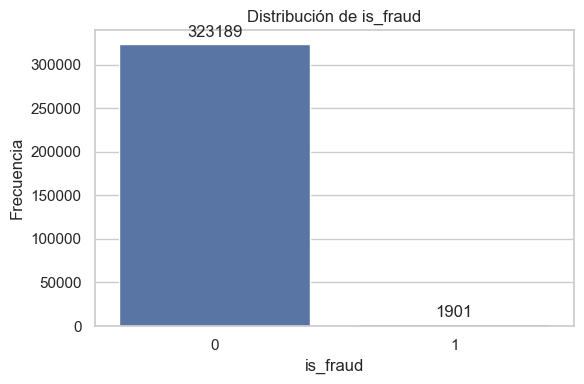

In [34]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(6, 4))

ax = sns.countplot(x="is_fraud", data=df_final)

plt.title("Distribución de is_fraud")

plt.xlabel("is_fraud")

plt.ylabel("Frecuencia")

for p in ax.patches:
    v = int(p.get_height())
    ax.annotate(
        str(v),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        xytext=(0, 3),
        textcoords="offset points")

plt.tight_layout()

plt.show()

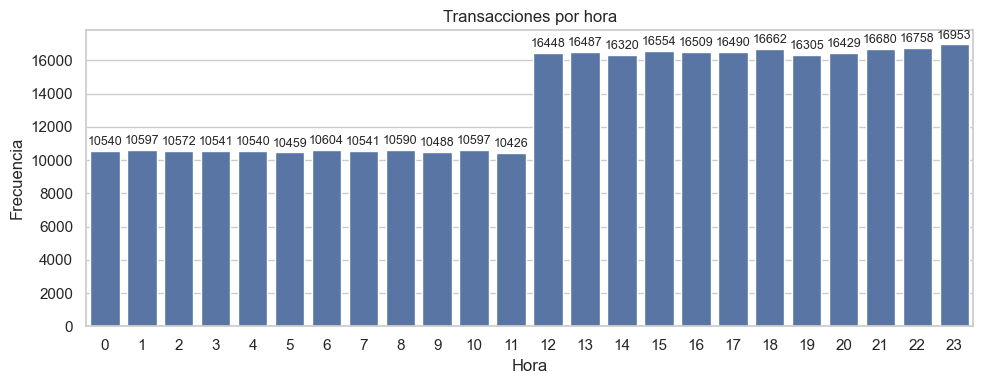

In [36]:
sns.set(style="whitegrid", context="notebook")

plt.figure(figsize=(10, 4))

ax = sns.countplot(x="hour", data=df_final, order=sorted(df_final["hour"].unique()))

plt.title("Transacciones por hora")

plt.xlabel("Hora")

plt.ylabel("Frecuencia")

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
        xytext=(0, 2),
        textcoords="offset points")

plt.tight_layout()

plt.show()

Tratamiento específico de `is_fraud` y `hour`

`is_fraud`: es una variable binaria (0/1), por lo que un histograma no aporta información adicional frente a un recuento directo. Se utiliza un countplot para mostrar claramente el número de transacciones fraudulentas y no fraudulentas, y evidenciar el desbalanceo de clases.

`hour`: aunque sea numérica, representa una variable discreta con categorías naturales (0–23). Un gráfico de barras permite comparar de forma directa cuántas transacciones ocurren en cada hora y detectar patrones horarios de actividad.

### Histogramas

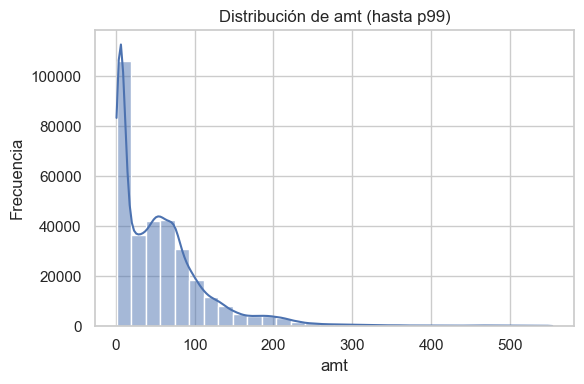

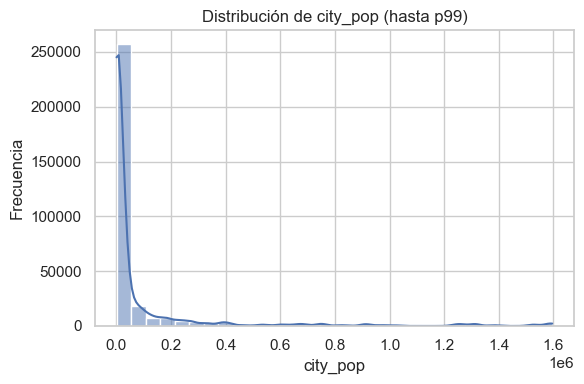

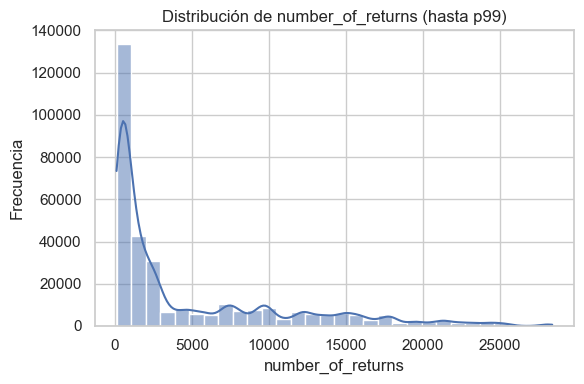

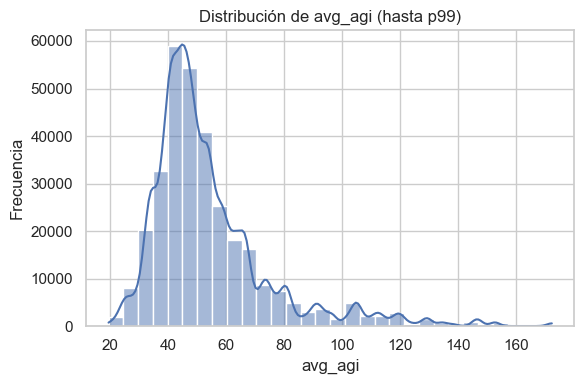

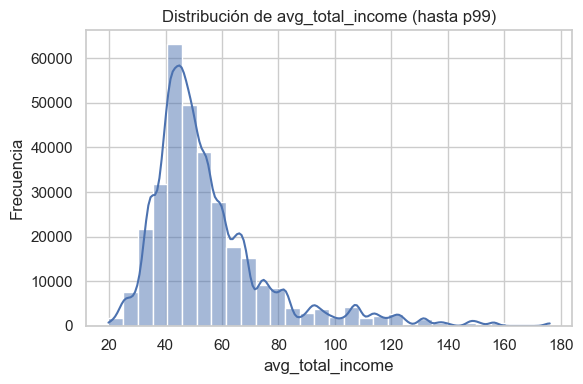

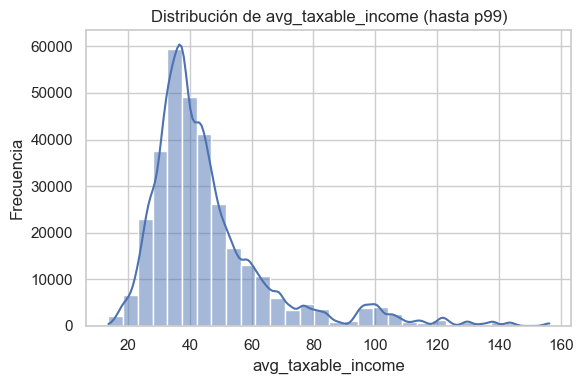

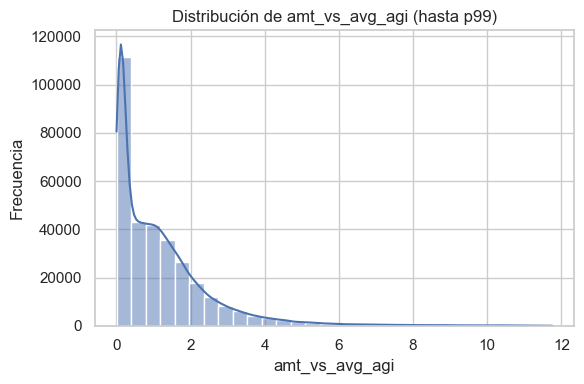

In [38]:
sns.set(style="whitegrid", context="notebook")

cols = ["amt", "city_pop", "number_of_returns", "avg_agi", "avg_total_income", "avg_taxable_income", "amt_vs_avg_agi"]

for col in cols:

    x = df_final[col].dropna()

    p99 = x.quantile(0.99)

    plt.figure(figsize=(6, 4))

    sns.histplot(x[x <= p99], bins=30, stat="count", kde=True)

    plt.title(f"Distribución de {col} (hasta p99)")

    plt.xlabel(col)

    plt.ylabel("Frecuencia")

    plt.tight_layout()

    plt.show()

Las variables `amt`, `city_pop`, `number_of _returns`, `avg_agi`, `avg_total_income`, `avg_taxable_income` y `amt_vs_avg_agi` pueden presentar distribuciones muy asimétricas con cola hacia la derecha y valores extremos. Si se representan sin tratamiento, unos pocos valores muy altos aplastan el histograma y ocultan la forma real donde se concentra la mayoría de observaciones.<br>
Por ello, se aplica un recorte al percentil 99 únicamente para visualización, lo que permite observar mejor el comportamiento típico del conjunto sin perder la referencia de que existen outliers.

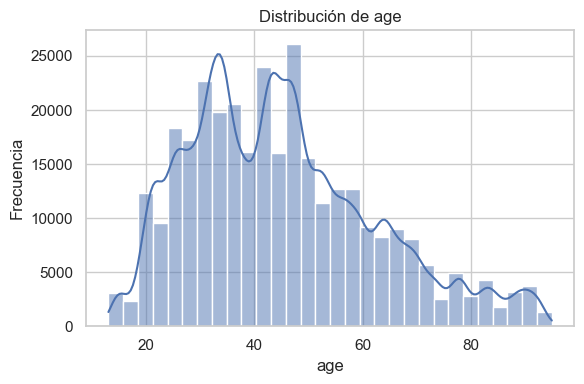

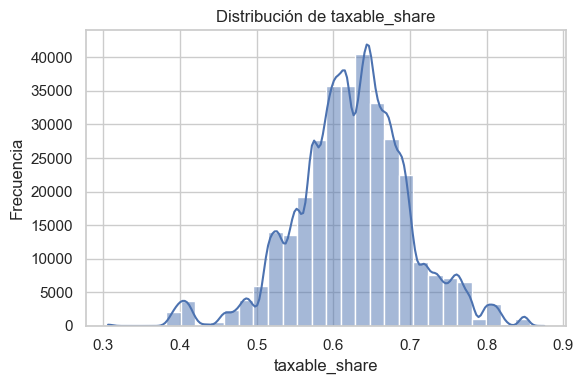

In [29]:
sns.set(style="whitegrid", context="notebook")

smooth_cols = ["age", "taxable_share"]

for col in smooth_cols:

    plt.figure(figsize=(6, 4))

    sns.histplot(df_final[col].dropna(), bins=30, stat="count", kde=True)

    plt.title(f"Distribución de {col}")

    plt.xlabel(col)

    plt.ylabel("Frecuencia")

    plt.tight_layout()
    
    plt.show()


En las variables `age` y `taxable_share` la distribución suele ser más estable y menos dominada por outliers extremos, por esta razón se decide realizar los histogramas de forma separada del resto de variables.

**Observaciones:**

`is_fraud`: La distribución esta fuertemente desbalanceada, la gran mayoría de registros corresponden a 0 (no fraude) con 323.189 frente a una fracción muy reducida de 1 (fraude) con 1.901, lo que supone aproximadamente un 0,58% de fraude.

`hour`: El gráfico muestra un patrón horario claramente desigual. Entre las 00:00 y las 11:00 el volumen se mantiene relativamente estable en torno a 10,4 y 10,6 mil transacciones por hora, mientras que a partir de las 12:00 se observa un salto notable y hasta 16,3 y 17,0 mil transacciones por hora hasta las 23:00. Este comportamiento sugiere una mayor concentración de actividad desde el mediodía hasta la noche.

`amt`: La distribución muestra una concentración muy elevada en importes bajos y un descenso rápido conforme aumenta el valor de la transacción. Se aprecia una cola larga hacia la derecha con operaciones de importe muy alto poco frecuentes, lo que confirma una asimetría positiva marcada y la presencia de valores extremos que pueden comprimir la visualización en escala lineal.

`city_pop`: El histograma evidencia una fuerte concentración en poblaciones bajas y una cola derecha muy pronunciada que se extiende hasta valores próximos a 3 millones. Esto indica que el conjunto incluye mayoritariamente ZIPs asociados a localidades pequeñas o medianas, pero también incorpora grandes áreas urbanas poco frecuentes. La asimetría y la amplitud del rango sugieren una variable altamente heterogénea, donde los valores extremos pueden dominar la representación en escala lineal.

`number_of_returns`: Se observa una gran concentración en valores bajos y una cola hacia la derecha prolongada hacia valores altos. Este patrón sugiere una distribución muy asimétrica, donde la mayoría de códigos postales presenta volúmenes moderados y un grupo reducido concentra niveles de declaraciones significativamente superiores.

`avg_agi`: La distribución se concentra principalmente en un rango central en torno a valores medios, con una caída progresiva hacia la derecha. También muestra una cola hacia la derecha con casos aislados de promedios muy altos, lo que apunta a observaciones atípicas en ciertos códigos postales.

`avg_total_income`: El histograma muestra una concentración clara de observaciones en torno a valores aproximados entre 40 y 70, donde se sitúa la mayor parte del conjunto. A partir de ese tramo, la frecuencia disminuye de forma progresiva y aparece una cola hacia la derecha con un número reducido de ZIPs que presentan promedios de ingreso total significativamente más altos.

`avg_taxable_income`: La distribución se concentra principalmente en torno a valores medios aproxdimadamente entre 30 y 60, con una disminución progresiva hacia la derecha. Además se observa igualmente una cola derecha con casos aislados que alcanzan valores elevados de hasta 400. Esto sugiere la presencia de ZIPs con promedios imponibles atípicos, que pueden influir en la media y justificar el uso de escalas alternativas en visualización.

`amt_vs_avg_agi`: La distribución presenta una marcada asimetría positiva, con una cola prolongada hacia la derecha. La mayor parte de las observaciones se concentra en valores bajos, lo que indica que, la mayoría de transacciones representan una fracción moderada respecto al nivel de renta medio del ZIP, se observa una cola prolongada hacia la derecha, evidenciando la existencia de transacciones relativamente altas frente al contexto económico local. Esto sugiere que esta variable puede ser útil para identificar operaciones atípicas en términos relativos.

`age`: La distribución de edad se concentra principalmente en el rango adulto, con mayor densidad aproximadamente entre los 25 y 60 años. Se aprecia una disminución progresiva a partir de edades más avanzadas, con una cola hacia valores altos, usuarios de mayor edad y menor presencia en edades muy jóvenes. En conjunto, la variable refleja un perfil de usuarios predominantemente adulto y una dispersión moderada, lo que facilita segmentaciones por tramos de edad para comparativas posteriores.

`taxable_share` : La variable muestra una distribución relativamente concentrada alrededor de valores centrales, con un pico principal en torno a 0,62 y 0,66, lo que indica que, para la mayoría de ZIPs, la proporción de ingreso imponible sobre el ingreso total se mantiene en niveles similares.

### Boxplot

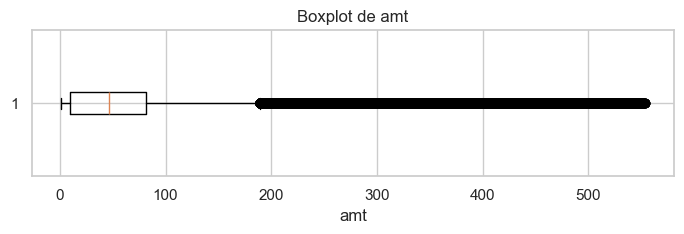

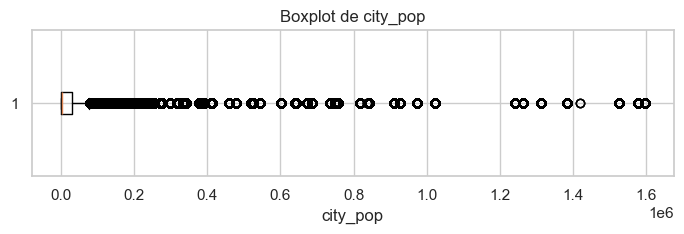

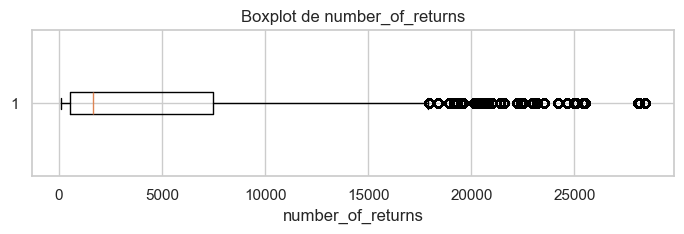

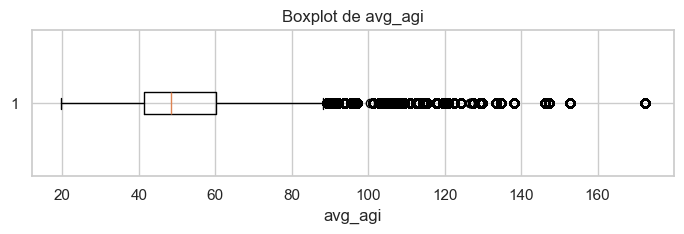

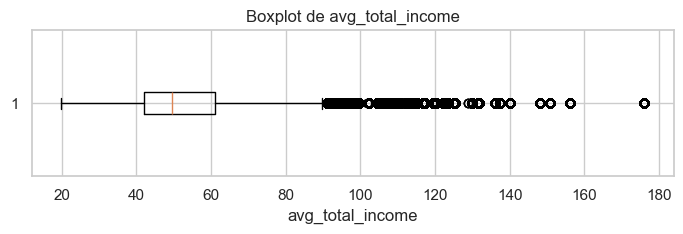

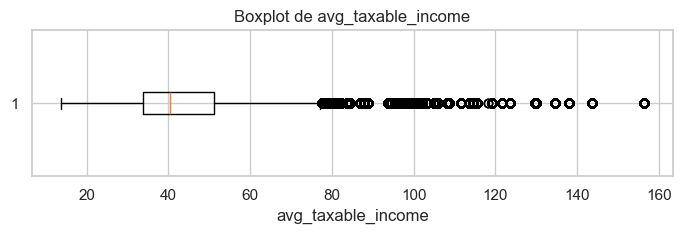

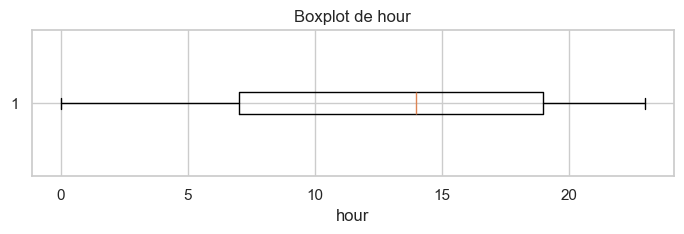

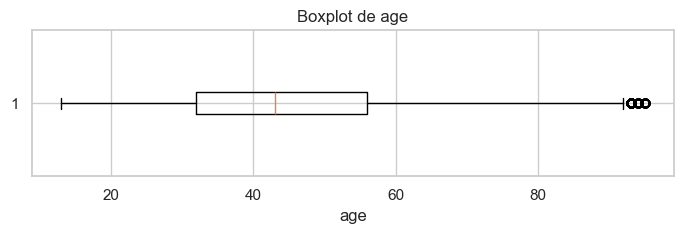

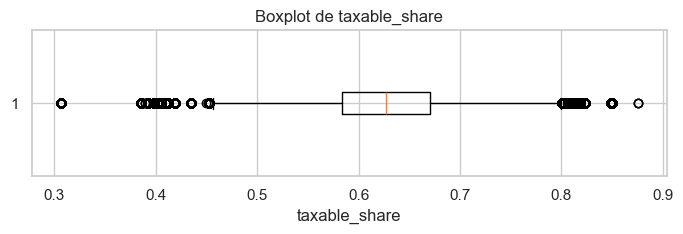

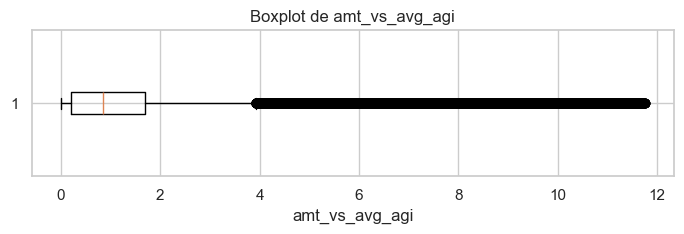

In [49]:
excluir = {"is_fraud"}

box_columns = [c for c in cols_num_final if c not in excluir]

clip_cols = {"amt", "city_pop", "amt_vs_avg_agi", "number_of_returns",
             "avg_agi", "avg_total_income", "avg_taxable_income"}

for col in box_columns:

    x = df_final[col].dropna()

    if col in clip_cols:

        p99 = x.quantile(0.99)

        x = x[x <= p99]

    plt.figure(figsize=(7, 2.5))

    plt.boxplot(x, vert=False, showfliers=True)

    plt.title(f"Boxplot de {col}" )

    plt.xlabel(col)

    plt.tight_layout()

    plt.show()


Se excluye la variable `is_fraud` por no ser adecuada para un boxplot.

`is_fraud`: es una variable binaria 0 y 1, en un boxplot no aporta información adicional relevante porque la distribución, ya que solo puede tomar dos valores.

Se eliminan los valores nulos antes de graficar, aplicando **dropna()** para evitar errores y asegurar que los gráficos representen únicamente observaciones válidas.

Las variables como `amt`, `city_pop`, `amt_vs_avg_agi` pueden tener algunos valores muy altos (outliers), por esta razón, si se dibuja el boxplot con todos los datos, esos valores extremos hacen que la caja quede aplastada y casi no se vea el comportamiento típico, para visualizar mejor, se limita el gráfico al percentil 99. De esta manera el boxplot es más legible y permite ver mejor la mediana y los cuartiles.

**Observaciones:**

`amt`: El boxplot muestra una asimetría positiva marcada. La caja se concentra en importes relativamente bajos, mientras que el bigote superior y la gran cantidad de puntos reflejan muchos valores atípicos altos. Incluso con el rango recortado para visualizar, se observa claramente que hay transacciones de importe excepcional que amplían la dispersión.

`city_pop`: La caja se sitúa muy cerca de valores bajos, y aparece una cola muy larga hacia la derecha con numerosos outliers. Esto confirma que la mayoría de transacciones se asocian a zonas poco pobladas, pero existe un conjunto de registros en grandes áreas urbanas que introduce gran variabilidad.

`number_of_returns`: Se observa una distribución con gran dispersión y clara asimetría positiva. La mediana está muy por debajo del extremo superior, y aparecen múltiples outliers altos, lo que indica que la mayoría de ZIPs tiene volúmenes moderados de declaraciones, pero hay ZIPs con actividad fiscal mucho mayor.

`avg_agi`: El rango central se concentra en valores moderados, pero hay numerosos outliers hacia valores altos. Esto sugiere que, aunque el patrón típico de renta media por declaración es relativamente estable, existen ZIPs con niveles de renta promedio inusualmente elevados que estiran la distribución.

`avg_total_income`: La caja está centrada en valores moderados, se observan outliers altos que indican ZIPs con ingresos totales promedio significativamente superiores al resto, también se observa que la distribución es asimétrica hacia la derecha.

`avg_taxable_income`: La caja se sitúa en niveles inferiores respecto a `avg_agi` y `avg_total_income`, lo que es coherente porque el ingreso imponible suele ser una parte del total. Aun así, se observan outliers altos, indicando ZIPs con ingreso imponible promedio excepcionalmente elevado.

`hour`: El boxplot muestra una distribución amplia entre 0 y 23 con un centro alrededor de la mediana. No se aprecian outliers relevantes, la caja refleja que el rango central de actividad se concentra en horas diurnas, entre mañana y tarde-noche.

`age`: La distribución se concentra en edades adultas, además muestra una ligera cola hacia edades más altas. Se observan algunos outliers en edades avanzadas, indicando pocos casos muy por encima del rango típico.

`taxable_share`: La caja es relativamente estrecha y está centrada alrededor de 0,63, lo que indica baja dispersión en el comportamiento central. Se observan outliers tanto por debajo de 0,5 como por encima de 0,8, que representan ZIPs con ingresos menos habituales, aunque son casos minoritarios.

`amt_vs_avg_agi`: El boxplot evidencia una asimetría positiva muy fuerte, aparecen numerosos outliers altos, lo que indica transacciones que son excepcionalmente grandes.

## Análisis univariante de variables categóricas

Se separan las variables categóricas en dos grupos baja y alta cardinalidad para que el análisis sea más interpretable y representativo.

En las variables de baja cardinalidad, se analiza la distribución completa o casi completa, ya que cada categoría tiene suficiente presencia y las comparaciones son claras.

En las variables de alta cardinalidad, existen cientos o miles de valores distintos. Si se intenta mostrar todo, el resultado sería ilegible, lo que puede llevar a interpretaciones poco fiables. Por eso, en estos casos se analiza el Top 10 por frecuencia y se acompaña de métricas como el número de categorías únicas y la concentración, para entender si la distribución está concentrada en pocos valores o dispersa en muchos.

### Frecuencias y proporciones

In [56]:
cat_baja_car = ["gender","day_of_week","moment_of_day","age_group","income_level","state","category"]

for col in cat_baja_car:

    print(f"\nColumna: {col}")

    display(df_final[col].value_counts().head(10))
    
    display((df_final[col].value_counts(normalize=True).head(10) * 100).round(2))


Columna: gender


gender
Female    175934
Male      149156
Name: count, dtype: int64

gender
Female    54.12
Male      45.88
Name: proportion, dtype: float64


Columna: day_of_week


day_of_week
Monday       63890
Sunday       62834
Saturday     50756
Tuesday      39851
Friday       38200
Thursday     36923
Wednesday    32636
Name: count, dtype: int64

day_of_week
Monday       19.65
Sunday       19.33
Saturday     15.61
Tuesday      12.26
Friday       11.75
Thursday     11.36
Wednesday    10.04
Name: proportion, dtype: float64


Columna: moment_of_day


moment_of_day
afternoon        82318
evening          65886
night            52790
late night       50391
morning          42101
early morning    31604
Name: count, dtype: int64

moment_of_day
afternoon        25.32
evening          20.27
night            16.24
late night       15.50
morning          12.95
early morning     9.72
Name: proportion, dtype: float64


Columna: age_group


age_group
26-35    76165
36-45    67524
46-55    61617
56-65    37517
18-25    32820
66-75    22057
76-85    12985
86+       9004
<18       5401
Name: count, dtype: int64

age_group
26-35    23.43
36-45    20.77
46-55    18.95
56-65    11.54
18-25    10.10
66-75     6.78
76-85     3.99
86+       2.77
<18       1.66
Name: proportion, dtype: float64


Columna: income_level


income_level
low             81542
upper-middle    81527
lower-middle    81210
high            80811
Name: count, dtype: int64

income_level
low             25.08
upper-middle    25.08
lower-middle    24.98
high            24.86
Name: proportion, dtype: float64


Columna: state


state
Texas           25556
Pennsylvania    20538
New York        16197
Illinois        14716
Florida         14087
California      13196
Ohio            11836
Alabama          9224
Virginia         8783
Kentucky         8740
Name: count, dtype: int64

state
Texas           7.86
Pennsylvania    6.32
New York        4.98
Illinois        4.53
Florida         4.33
California      4.06
Ohio            3.64
Alabama         2.84
Virginia        2.70
Kentucky        2.69
Name: proportion, dtype: float64


Columna: category


category
Gas_transport     31941
Grocery_pos       30995
Home              30984
Shopping_pos      29556
Kids_pets         28177
Shopping_net      24252
Entertainment     23619
Food_dining       23224
Personal_care     22748
Health_fitness    21555
Name: count, dtype: int64

category
Gas_transport     9.83
Grocery_pos       9.53
Home              9.53
Shopping_pos      9.09
Kids_pets         8.67
Shopping_net      7.46
Entertainment     7.27
Food_dining       7.14
Personal_care     7.00
Health_fitness    6.63
Name: proportion, dtype: float64

**Observaciones:**

`gender`: La distribución por género es relativamente equilibrada, con una ligera mayoría de transacciones realizadas por Female representan el 54,12%, frente a Male 45,88%. Esta diferencia sugiere una participación algo mayor del segmento femenino en el conjunto de datos, aunque sin un desequilibrio extremo.

`day_of_week`: El volumen de transacciones no es uniforme a lo largo de la semana. El **Lunes** con 63.890 transacciones, representando el 19,65% y el **Domingo** con 62.834 transacciones, representando el 19,33% concentran la mayor actividad, seguidos de el **Sabado** con 50.756 transacciones, representando el 15,61%. En cambio, el **Miercoles** es el día con menor proporción, con un 10,04% y 32.636 transacciones. En conjunto, se observa una mayor concentración al inicio y final de la semana.

`moment_of_day`: La actividad se concentra principalmente por la tarde con el 25,32% y al anocher con el 20,27%, segudio de la noche con un 16,24%, mientras que de madrugada es la franja con menor presencia un 9,72%. Este patrón indica que la mayoría de transacciones ocurre en franjas diurnas y de tarde, con menor actividad en primeras horas del día.

`age_group`: La muestra está dominada por grupos de edad adulta. El tramo 26 a 35 es el más frecuente con un 23,43%, seguido de 36 a 45 con un 20,77% y 46 a 55 con un 18,95%. A partir de los 56 años la proporción desciende progresivamente, y los extremos  menores de 18 con 1,66% y mayores de 86 con 2,77% tienen una presencia reducida. Esto sugiere que el patrón de transacciones está principalmente impulsado por población en edad laboral.

`income_level`: Los cuatro grupos presentan proporciones prácticamente iguales con un 25% cada uno, lo cual es coherente con una segmentación por cuartiles. Esta distribución es positiva para comparativas posteriores, ya que evita grupos con muy poca representación y permite analizar diferencias entre niveles de renta con estabilidad.

`state` **Top 10**: Existe concentración en algunos estados. **Texas** es el estado con mayor volumen con un 7,86%, seguido de **Pennsylvania** con un 6,32% y **New York** con un 4,98%. El resto del Top 10 se sitúa entre 2,7% y 4,5% cada uno. En conjunto, el dataset no está dominado por un único estado, pero sí presenta una mayor representación de ciertos territorios.

`category` **Top 10**: Las categorías están relativamente repartidas, aunque destacan algunas con mayor volumen. **Gas_transport** es la más frecuente con un 9,83%, seguida muy de cerca por **Grocery_pos** y **Home** ambas con un 9,53% y **Shopping_pos** con un 9,09%. El resto del Top 10 se mueve en el rango aproximado de 6,6% a 8,7%. Esto sugiere una distribución bastante diversificada, sin una única categoría dominante, lo que facilita análisis comparativos por tipo de comercio.

In [55]:
cat_grandes = ["merchant", "city", "job", "zip"]

for col in cat_grandes:

    print(f"\nColumna: {col}")

    print("Categorías únicas:", df_final[col].nunique(dropna=False))

    top_counts = df_final[col].value_counts(dropna=False).head(10)

    top_perc = (df_final[col].value_counts(normalize=True, dropna=False).head(10) * 100).round(2)

    display(top_counts)

    display(top_perc)

    top10 = (top_counts.sum() / len(df_final) * 100).round(2)
    
    print("Concentración Top 10 (% del total):", top10)


Columna: merchant
Categorías únicas: 693


merchant
fraud_Kilback LLC                     1161
fraud_Boyer PLC                        906
fraud_Dickinson Ltd                    888
fraud_Cormier LLC                      883
fraud_Schumm PLC                       881
fraud_Kuhn LLC                         856
fraud_Jenkins, Hauck and Friesen       701
fraud_Schiller, Blanda and Johnson     686
fraud_Bartoletti-Wunsch                681
fraud_Rodriguez Group                  671
Name: count, dtype: int64

merchant
fraud_Kilback LLC                     0.36
fraud_Boyer PLC                       0.28
fraud_Dickinson Ltd                   0.27
fraud_Cormier LLC                     0.27
fraud_Schumm PLC                      0.27
fraud_Kuhn LLC                        0.26
fraud_Jenkins, Hauck and Friesen      0.22
fraud_Schiller, Blanda and Johnson    0.21
fraud_Bartoletti-Wunsch               0.21
fraud_Rodriguez Group                 0.21
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 2.56

Columna: city
Categorías únicas: 760


city
Phoenix         1593
San Antonio     1556
Meridian        1531
Warren          1370
Thomas          1360
Cleveland       1355
Naples          1277
Indianapolis    1262
Burbank         1245
Brandon         1244
Name: count, dtype: int64

city
Phoenix         0.49
San Antonio     0.48
Meridian        0.47
Warren          0.42
Thomas          0.42
Cleveland       0.42
Naples          0.39
Indianapolis    0.39
Burbank         0.38
Brandon         0.38
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 4.24

Columna: job
Categorías únicas: 463


job
Designer, Ceramics/Pottery             2496
Financial Adviser                      2302
It Trainer                             2297
Environmental Consultant               2222
Chartered Public Finance Accountant    2166
Exhibition Designer                    2123
Copywriter, Advertising                2119
Materials Engineer                     1989
Agricultural Consultant                1987
Comptroller                            1974
Name: count, dtype: int64

job
Designer, Ceramics/Pottery             0.77
Financial Adviser                      0.71
It Trainer                             0.71
Environmental Consultant               0.68
Chartered Public Finance Accountant    0.67
Exhibition Designer                    0.65
Copywriter, Advertising                0.65
Materials Engineer                     0.61
Agricultural Consultant                0.61
Comptroller                            0.61
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 6.67

Columna: zip
Categorías únicas: 823


zip
34112    1129
73754    1109
48088    1073
82514    1034
39073     979
05461     970
72042     959
72476     956
38761     956
07060     953
Name: count, dtype: int64

zip
34112    0.35
73754    0.34
48088    0.33
82514    0.32
39073    0.30
05461    0.30
72042    0.29
72476    0.29
38761    0.29
07060    0.29
Name: proportion, dtype: float64

Concentración Top 10 (% del total): 3.11


**Observaciones:**

`merchant`: La variable presenta alta cardinalidad con 693 comercios distintos y una distribución muy dispersa. El comercio más frecuente es **fraud_Kilback LLC** con 1.161 transacciones, seguido de **fraud_Boyer PLC** con 906 y **fraud_Dickinson Ltd** con 888. Sin embargo, la concentración del Top 10 es únicamente del 2,56%, lo que confirma que la mayoría de transacciones se reparte entre muchos comercios con baja frecuencia. Para análisis posteriores es recomendable aplicar un umbral mínimo de volumen por merchant para obtener resultados estables.

`city`: Se observa una cardinalidad elevada con 760 ciudades, con una concentración moderada. La ciudad con más registros es **Phoenix** con 1.593 transacciones, seguida de **San Antonio** con 1.556 y **Meridian** con 1.531. A pesar de ello, el Top 10 solo concentra el 4,24% del total, lo que indica que las transacciones están ampliamente distribuidas entre muchas ciudades. Esto sugiere que, para comparativas más robustas, puede ser más conveniente trabajar por niveles geográficos agregados, como por ejemplo, `state` o filtrar ciudades con suficiente número de observaciones.

`job`: La variable incluye 463 ocupaciones distintas. La ocupación más frecuente es **Designer, Ceramics/Pottery** con 2.496, seguida de **Financial Adviser** 2.302 e **IT Trainer** con 2.297. El Top 10 representa el 6,67% de las transacciones, lo que indica cierta concentración, aunque sigue existiendo una elevada diversidad de categorías con frecuencias bajas. Para análisis posteriores por ocupación conviene limitarse a las más representativas o aplicar un mínimo de registros por categoría.

`zip`: La variable zip presenta una granularidad geográfica muy alta, con 823 códigos postales distintos. El ZIP con mayor frecuencia es el **34112** con 1.129, seguido de **73754** con 1.109 y **48088** con 1.073. La concentración del Top 10 es del 3,11%, lo que evidencia una distribución muy fragmentada. En análisis bivariantes fraude por ZIP es importante imponer un umbral mínimo de transacciones por código postal o utilizar agregaciones por estado, para evitar conclusiones inestables por una baja muestra.

### Gráficos de barras

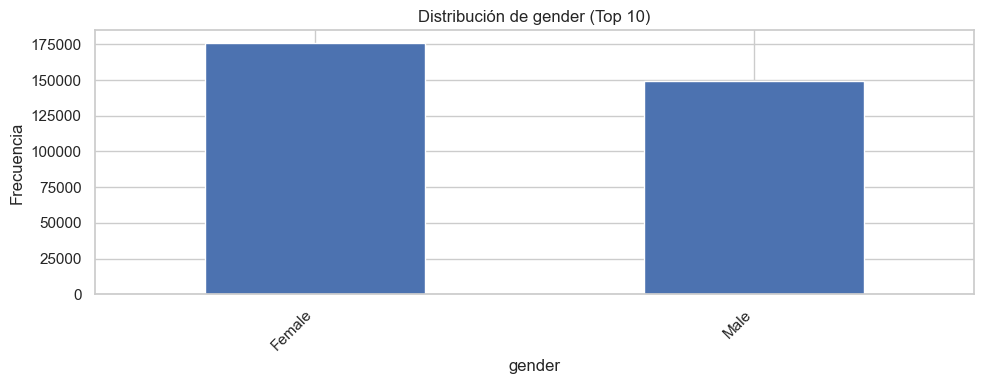

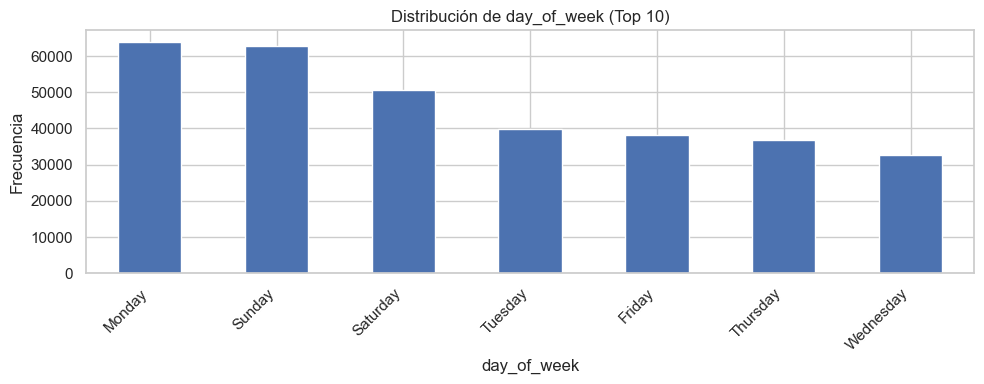

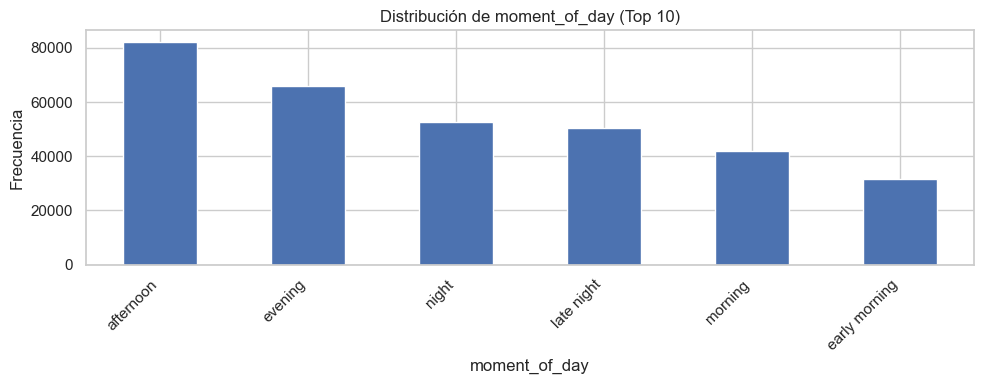

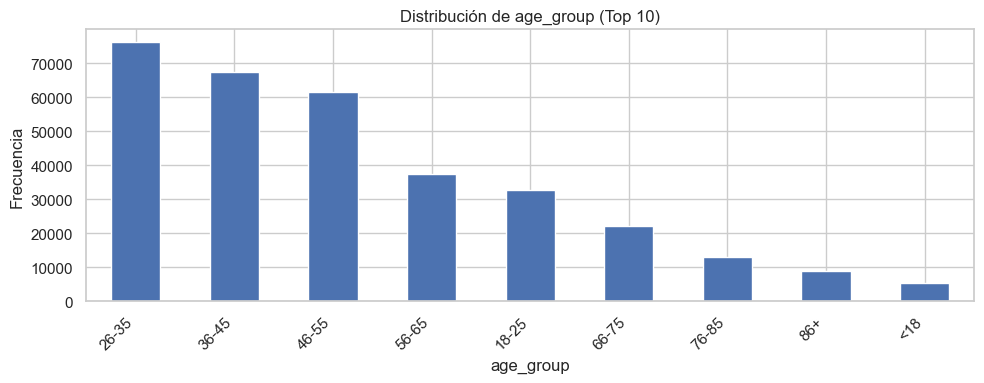

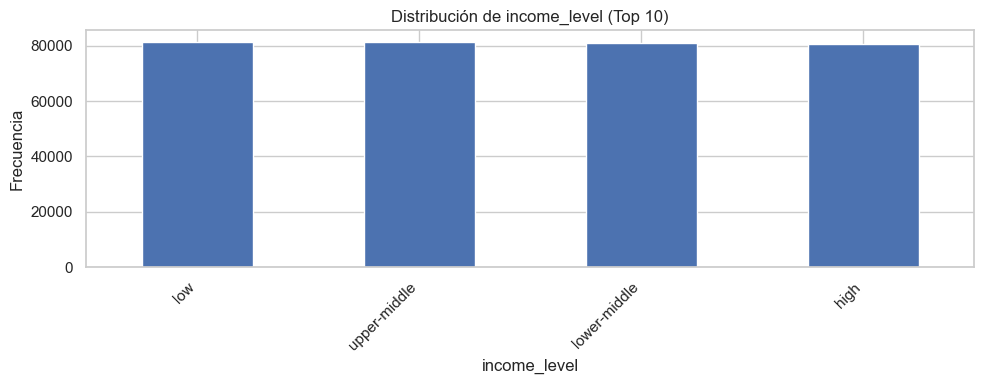

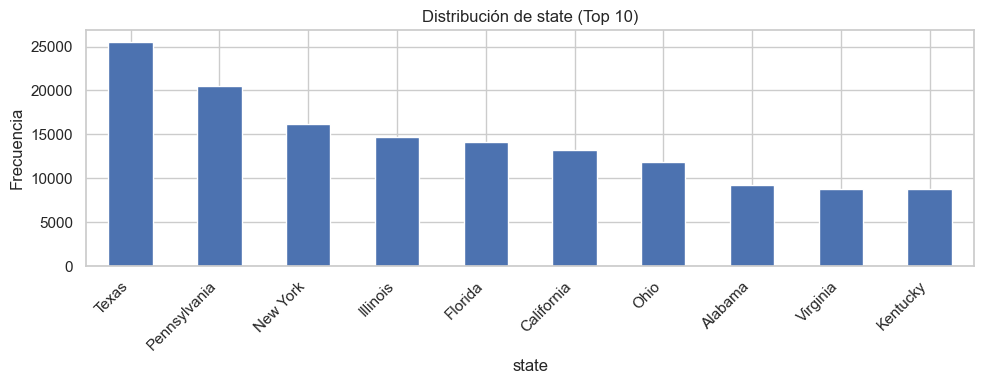

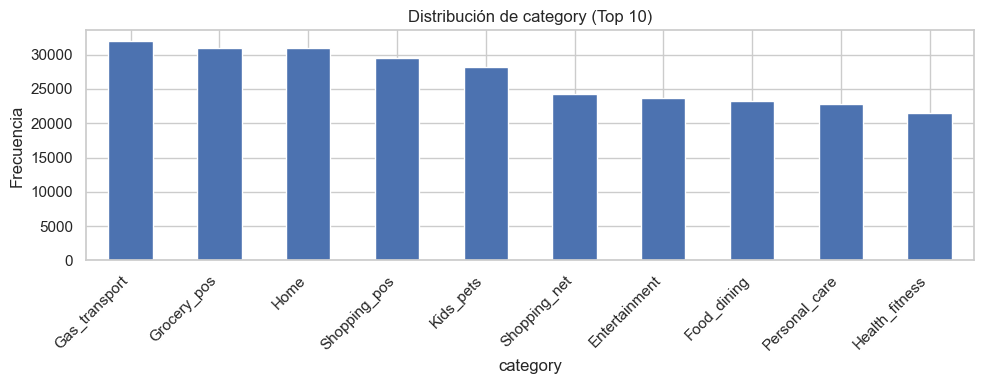

In [57]:
import matplotlib.pyplot as plt

cat_small = ["gender", "day_of_week", "moment_of_day", "age_group", "income_level", "state", "category"]

for col in cat_small:
    df_final[col].value_counts(dropna=False).head(10).plot(kind="bar", figsize=(10, 4))
    plt.title(f"Distribución de {col} (Top 10)")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

**Observaciones:**

`gender` **Top 10**: El gráfico confirma una distribución relativamente equilibrada por género, con una ligera mayor presencia de Female frente a Male. Aunque existe diferencia, no es lo suficientemente extrema como para considerar un sesgo fuerte de representación en el conjunto.

`day_of_week` **Top 10**: Se observa un mayor volumen de transacciones los **Lunes** y **Domingos**, seguidos de los **Sabados**, mientras que los **Miercoles** registra la menor frecuencia. En conjunto, la actividad se concentra más al inicio y final de la semana, lo que puede influir en análisis posteriores.

`moment_of_day` **Top 10**: La mayor parte de las transacciones ocurre por la **tarde** y al **anochecer**, con un volumen intermedio de noche. Las franjas de  por la **mañana** y especialmente las **primeras horas del día** presentan menor actividad. Esto sugiere un patrón de uso predominantemente diurno y de tarde.

`age_group` **Top 10**: El gráfico muestra que la mayor concentración de transacciones se da en edades adultas, destacando **26 a 35**, **36 a 45** y **46 a 55**. A partir de **56 a 65** el volumen disminuye y los tramos de edad más extremos **menors de 18** y **mayores de 86** representan una fracción pequeña del total. Esto indica que el comportamiento transaccional está dominado por población en edad laboral.

`income_level` **Top 10**: Los cuatro niveles aparecen con alturas muy similares, lo cual es consistente con una clasificación por cuartiles. Esta distribución uniforme facilita comparaciones posteriores entre niveles de renta, al no existir grupos infrarepresentados.

`state` **Top 10**: Se aprecia concentración moderada en algunos estados, con **Texas** como el más representado, seguido de **Pennsylvania** y **New York**. Aun así, el resto del Top 10 mantiene volúmenes relativamente cercanos, lo que sugiere una distribución geográfica amplia sin dominio absoluto de un único estado.

`category` **Top 10**: Las categorías presentan una distribución relativamente repartida, aunque destacan **Gas_transport**, **Grocery_pos** y **Home** como las más frecuentes. Las diferencias entre las primeras posiciones no son muy grandes, lo que indica diversidad en los tipos de gasto y permite análisis comparativos por categoría sin depender de un único tipo de transacción.


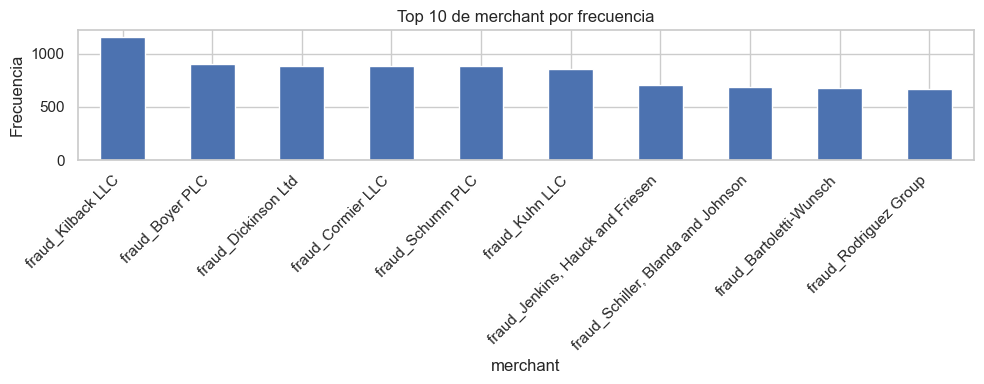

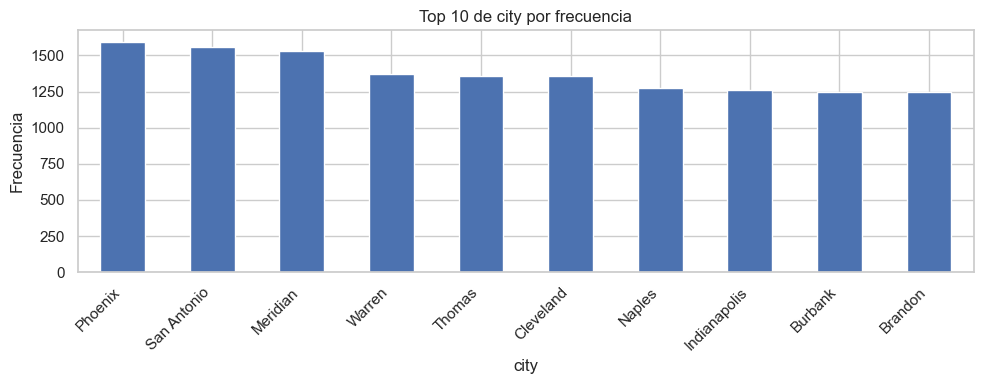

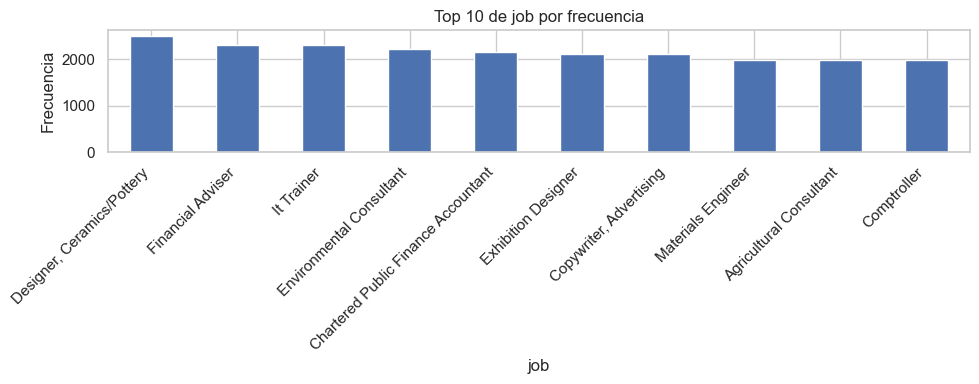

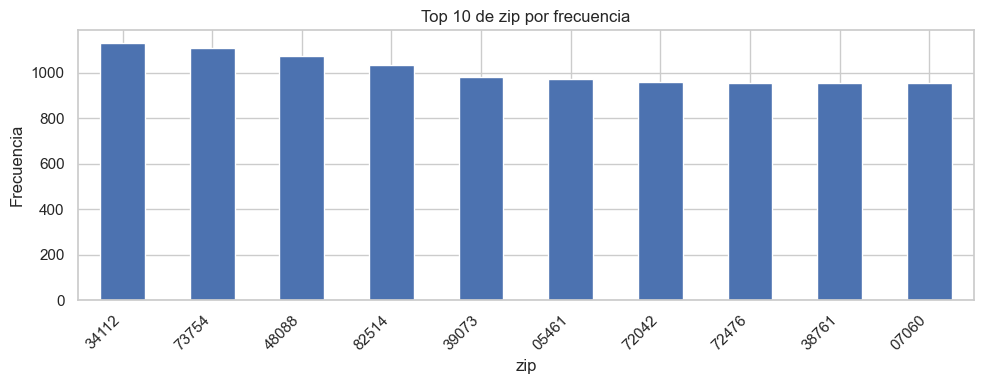

In [58]:
cat_big = ["merchant", "city", "job", "zip"]

for col in cat_big:
    top_counts = df_final[col].value_counts(dropna=False).head(10)

    top_counts.plot(kind="bar", figsize=(10, 4))
    plt.title(f"Top 10 de {col} por frecuencia")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

**Observaciones:**......................................

Top 10 de `merchant` por frecuencia: El gráfico muestra que los comercios más frecuentes tienen volúmenes relativamente cercanos (aprox. 650–1.160 transacciones). Destaca fraud_Kilback LLC como el merchant con mayor número de registros, pero sin una diferencia extrema respecto al resto del Top 10. En conjunto, el patrón sugiere baja concentración en el top y una distribución dispersa entre muchos merchants, por lo que para análisis posteriores por comercio conviene aplicar un umbral mínimo de transacciones.

Top 10 de city por frecuencia: Las diez ciudades con mayor frecuencia presentan recuentos muy similares (aprox. 1.240–1.600). Phoenix, San Antonio y Meridian encabezan la lista, pero ninguna domina claramente. Esto indica que la distribución por ciudad está bastante repartida y que el análisis por ciudad puede requerir filtros de tamaño o agregación (por ejemplo, por estado) para obtener conclusiones robustas.

Top 10 de job por frecuencia: Las ocupaciones más frecuentes se concentran en un rango moderado (aprox. 1.970–2.500). Designer, Ceramics/Pottery es la más representada, seguida de Financial Adviser e IT Trainer, con diferencias relativamente pequeñas entre categorías. Esto sugiere diversidad ocupacional y ausencia de una categoría claramente dominante; para comparaciones por ocupación es recomendable centrarse en categorías con suficiente volumen.

Top 10 de zip por frecuencia: Los ZIP del Top 10 aparecen con frecuencias próximas entre sí (aprox. 950–1.130), lo que confirma que no hay un conjunto reducido de códigos postales que concentre gran parte de las transacciones. La distribución geográfica a este nivel es fragmentada, por lo que cualquier análisis por ZIP (especialmente tasas de fraude) debería incorporar un mínimo de transacciones por ZIP o utilizar agregaciones geográficas más estables (p. ej., state).


### Variable objetivo `is_fraud`

Distribución de `is_fraud`

La variable objetivo `is_fraud` indica si una transacción se clasifica como `fraude` = **1** o `no fraude` = **0**. El recuento muestra una clara predominancia de operaciones legítimas frente a un número reducido de casos de fraude, lo que confirma una proporción muy baja de la clase positiva.

Esta distribución evidencia un fuerte desbalance de clases, la tasa de fraude es minoritaria, por lo que un modelo que predijera siempre **no fraude** podría obtener una exactitud aparente alta, pero resultaría poco útil para el objetivo real, que es detectar transacciones fraudulentas.

En resumen, `is_fraud` refleja un escenario habitual en detección de fraude, pocas incidencias frente a un gran volumen de operaciones normales, lo que condiciona el enfoque analítico y obliga a priorizar métricas y técnicas adecuadas para la clase minoritaria en fases posteriores.


## Análisis bivariante de variables numéricas vs `is_fraud`

### Boxplots agrupados por valor de `is_fraud`

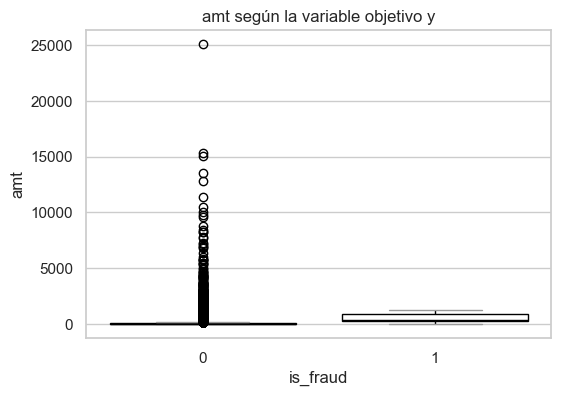

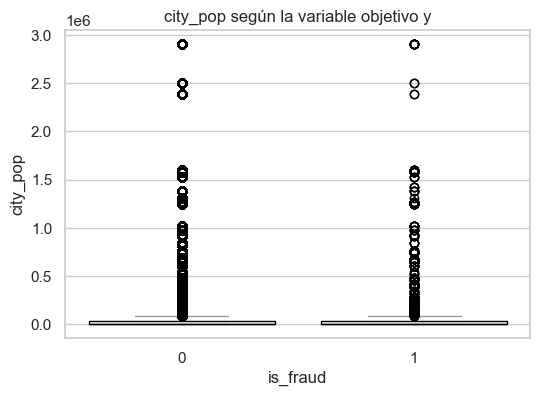

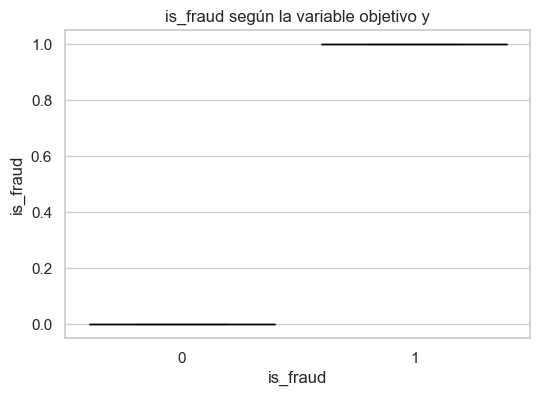

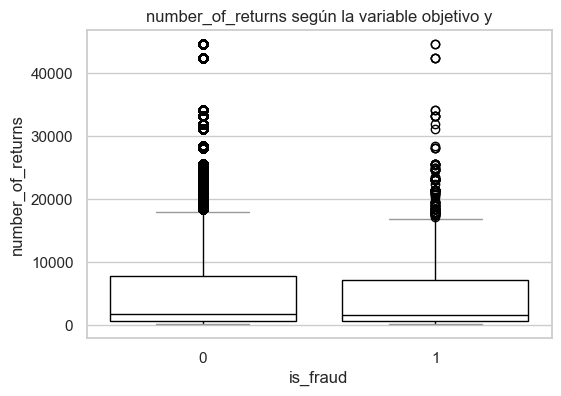

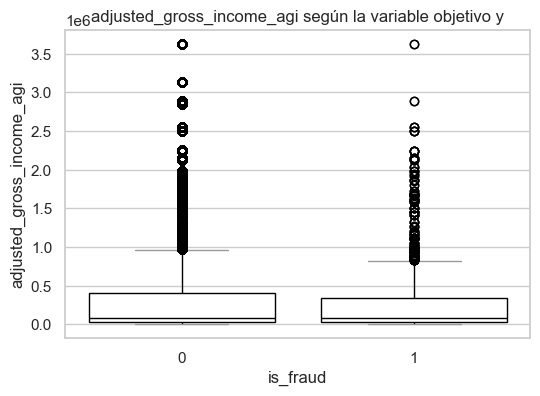

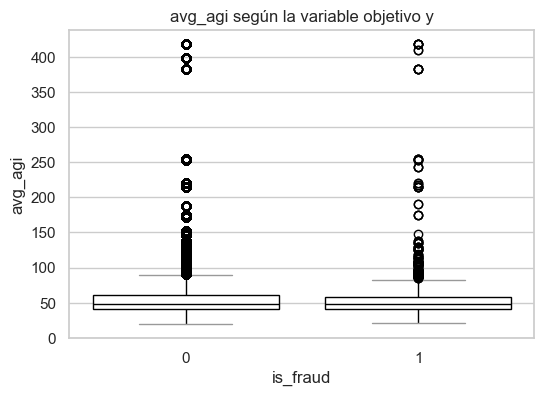

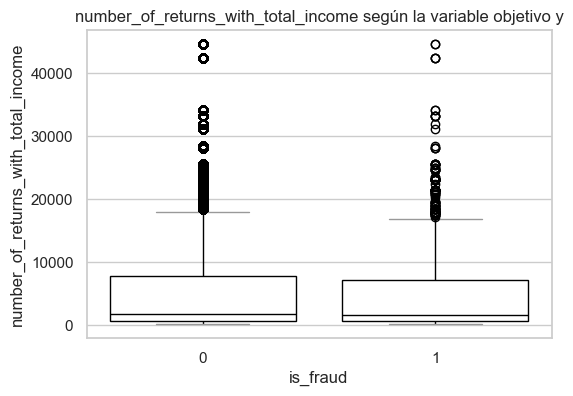

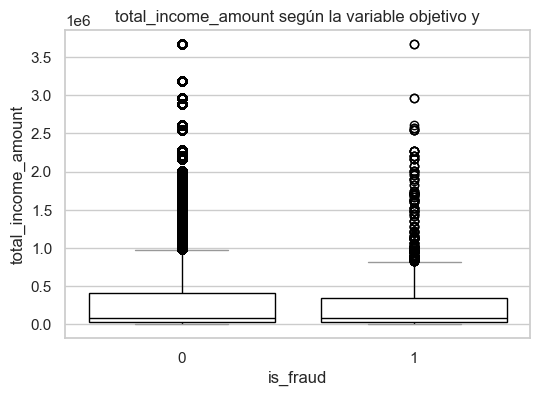

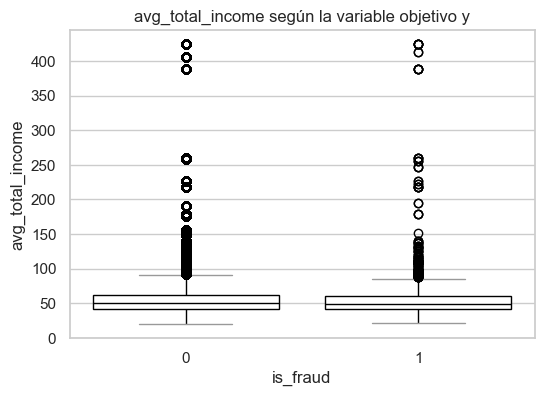

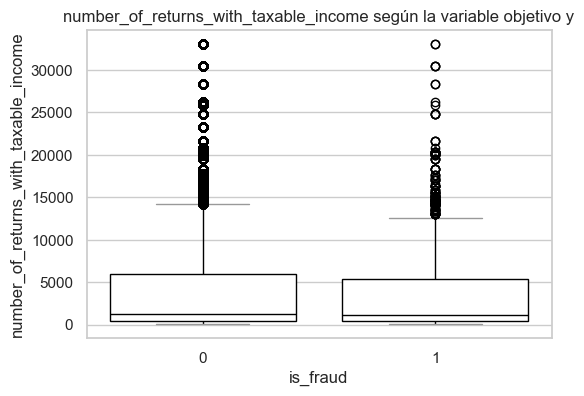

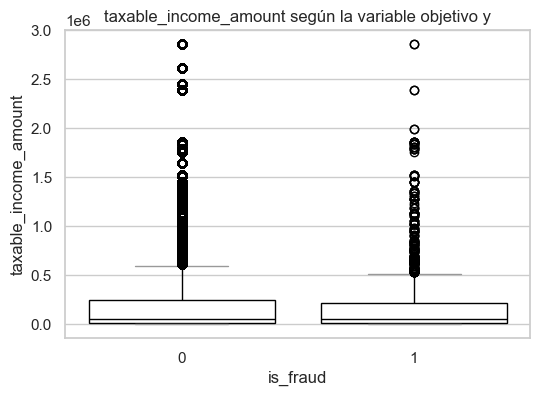

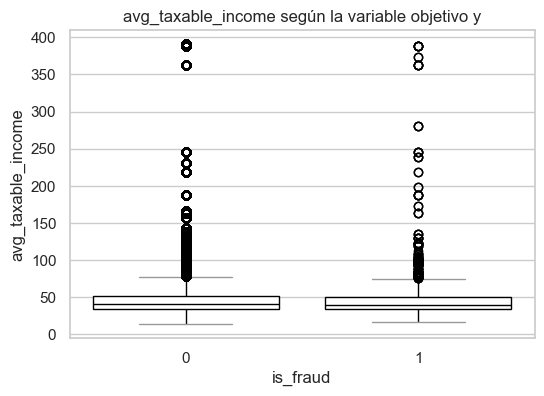

In [15]:
for col in cols_num_final:

    plt.figure(figsize=(6, 4))

    sns.boxplot(
        
        x='is_fraud',

        y=col,

        data=df_final,

        color='white', 

        boxprops={'edgecolor': 'black'},

        whiskerprops={'color': 'black'},

        medianprops={'color': 'black'},

        flierprops={'markeredgecolor': 'black'})
    
    plt.title(f'{col} según la variable objetivo y')
    
    plt.show()

**Observaciones**

In [16]:
df_final.groupby('is_fraud')[cols_num_final].median().T

is_fraud,0,1
amt,46.850000,362.280000
city_pop,4056.000000,4046.000000
is_fraud,0.000000,1.000000
number_of_returns,1680.000000,1510.000000
adjusted_gross_income_agi,82095.000000,76279.000000
avg_agi,48.573913,47.705190
number_of_returns_with_total_income,1680.000000,1510.000000
total_income_amount,82915.000000,77085.000000
avg_total_income,49.586170,48.720495
number_of_returns_with_taxable_income,1270.000000,1110.000000


**Observaciones**

## Análisis bivariante de variables catégoricas vs `is_fraud`

## Tablas de contingencia

In [18]:
for col in cols_cate_final:

    print(f'\nRelación entre {col} e is_fraud')

    tabla = pd.crosstab(df_final[col], df_final['is_fraud'], normalize='index') * 100
    
    display(tabla.round(2))


Relación entre merchant e is_fraud


is_fraud,0,1
merchant,,
fraud_Abbott-Rogahn,99.78,0.22
fraud_Abbott-Steuber,98.67,1.33
fraud_Abernathy and Sons,100.00,0.00
fraud_Abshire PLC,99.37,0.63
"fraud_Adams, Kovacek and Kuhlman",100.00,0.00
...,...,...
fraud_Zemlak Group,98.38,1.62
"fraud_Zemlak, Tillman and Cremin",100.00,0.00
fraud_Ziemann-Waters,99.51,0.49



Relación entre category e is_fraud


is_fraud,0,1
category,,
Entertainment,99.72,0.28
Food_dining,99.81,0.19
Gas_transport,99.57,0.43
Grocery_net,99.73,0.27
Grocery_pos,98.51,1.49
Health_fitness,99.89,0.11
Home,99.80,0.20
Kids_pets,99.78,0.22
Misc_net,98.47,1.53



Relación entre gender e is_fraud


is_fraud,0,1
gender,,
Female,99.44,0.56
Male,99.39,0.61



Relación entre city e is_fraud


is_fraud,0,1
city,,
Acworth,99.37,0.63
Adams,100.00,0.00
Afton,99.69,0.31
Akron,100.00,0.00
Albany,0.00,100.00
...,...,...
Wittenberg,98.61,1.39
Woods Cross,100.00,0.00
Woodville,100.00,0.00



Relación entre state e is_fraud


is_fraud,0,1
state,,
Alabama,99.35,0.65
Alaska,99.33,0.67
Arizona,99.14,0.86
Arkansas,99.26,0.74
California,99.43,0.57
Colorado,99.21,0.79
Connecticut,99.58,0.42
District of Columbia,99.09,0.91
Florida,99.49,0.51



Relación entre zip e is_fraud


is_fraud,0,1
zip,,
01257,100.00,0.00
01330,99.00,1.00
01535,97.66,2.34
01545,100.00,0.00
01612,98.00,2.00
...,...,...
98665,100.00,0.00
99033,99.45,0.55
99113,99.04,0.96



Relación entre job e is_fraud


is_fraud,0,1
job,,
Academic Librarian,99.17,0.83
"Accountant, Chartered",0.00,100.00
"Accountant, Chartered Certified",0.00,100.00
"Accountant, Chartered Public Finance",99.87,0.13
Accounting Technician,99.16,0.84
...,...,...
Water Engineer,100.00,0.00
Water Quality Scientist,99.33,0.67
Web Designer,99.22,0.78


**Observaciones**

## Barras apiladas